[Reference](https://medium.com/analytics-vidhya/trading-dashboard-pt-2-yfinance-python-d482678b498d)

In [3]:
!pip install hvplot

     |████████████████████████████████| 71kB 3.0MB/s 
     |████████████████████████████████| 1.6MB 5.6MB/s 


In [5]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 5.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=a00e7f90ef6e5d3ce9dc3a89e52b4d544bd0011121aa430f62a316e22d4a49e6
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [6]:
# Import libraries and dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
import yfinance as yf

In [8]:
## CHIPOTLE DATA - (3 year data)

cmg = yf.Ticker("CMG")

cmg_historical = cmg.history(start="2018-1-5", end="2021-1-5", interval="1d")
cmg_df = cmg_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])

## Rename the 'Close' column to the ticker for that company.

cmg_df.rename(columns= {'Close':'CMG'}, inplace=True)

## SHOPIFY DATA

shop = yf.Ticker("shop")

shop_historical = shop.history(start="2018-1-5", end="2021-1-5", interval="1d")
shop_df = shop_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])

## Rename the 'Close' column to mirror ticker symbol

shop_df.rename(columns= {'Close':'SHOP'}, inplace=True)

In [12]:
## Calculate Daily Returns for individual tickers

shop_daily = shop_df.pct_change()
cmg_daily = cmg_df.pct_change()
# fb_daily = fb_df.pct_change()
# panw_daily = panw_df.pct_change()
# tsla_daily = tsla_df.pct_change()
# amzn_daily = amzn_df.pct_change()

## CONCAT into one portfolio with all the daily returns
portfolio_df = pd.concat([shop_daily, cmg_daily], axis="columns", join="inner")
# fb_daily, amzn_daily, tsla_daily, panw_daily, 
daily_portfolio = portfolio_df
daily_portfolio.dropna()

,SHOP,CMG
Date,,
2018-01-08,0.016006,0.014914
2018-01-09,-0.014419,0.002826
2018-01-10,0.002438,0.007609
2018-01-11,0.001171,0.011498
2018-01-12,0.015027,0.005653
...,...,...
2020-12-28,-0.064022,-0.007830
2020-12-29,0.021402,-0.006622
2020-12-30,-0.007349,-0.012958


In [15]:
!pip install mplcyberpunk

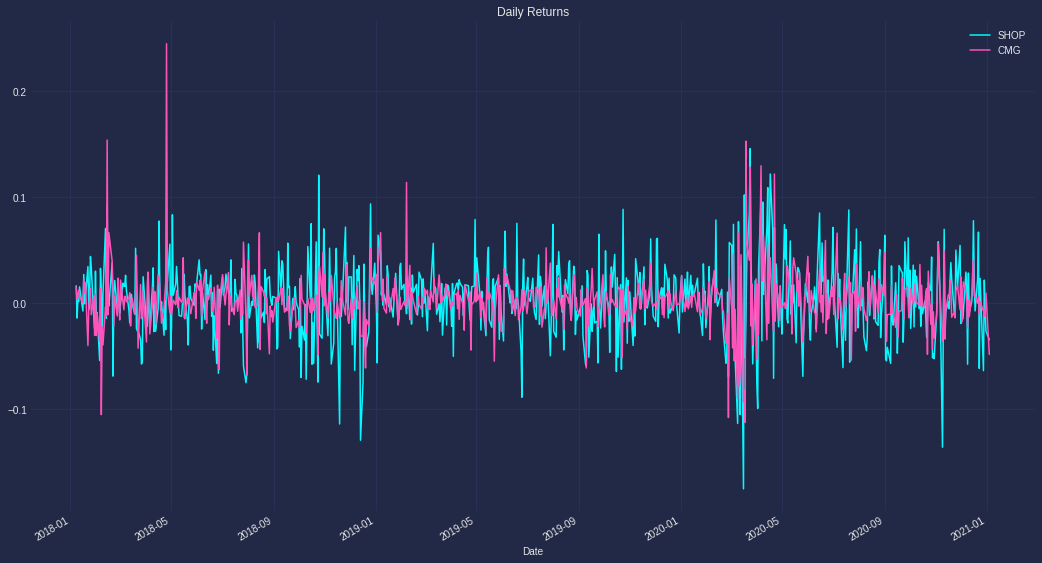

In [16]:
## Personal preference style....not needed.
import mplcyberpunk
from matplotlib import style
style.use('cyberpunk')

daily_portfolio.plot(figsize=(18, 10), title="Daily Returns")

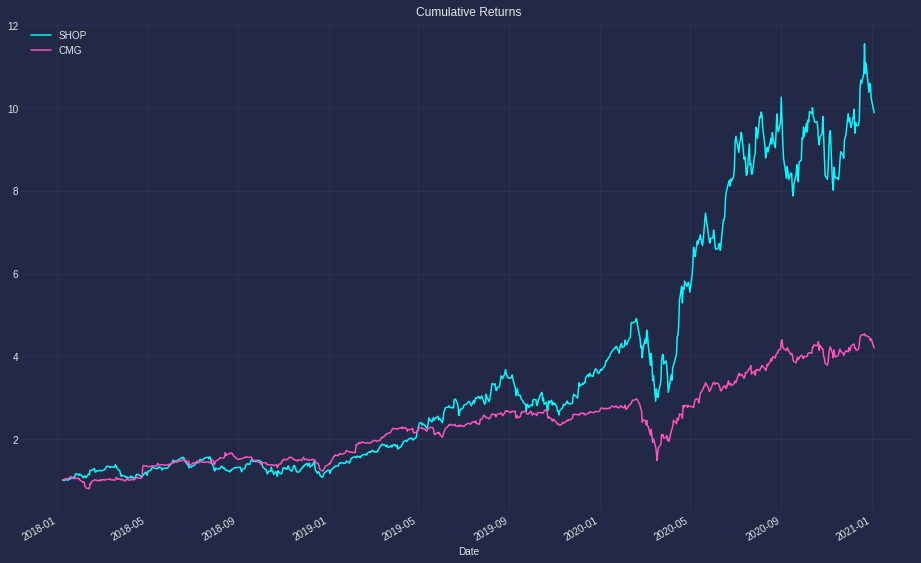

In [18]:
cumulative_returns = (1 + daily_portfolio).cumprod()

cumulative_returns.plot(figsize=(16, 10), title="Cumulative Returns")

In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 

daily_portfolio.std()

SHOP    0.035142
CMG     0.026069
dtype: float64

In [20]:
# Calculate the annualized standard deviation (252 trading days)

daily_portfolio.std() * np.sqrt(252)

SHOP    0.557858
CMG     0.413833
dtype: float64

In [21]:
# Construct a correlation table

corr_df = daily_portfolio.corr()
corr_df.style.background_gradient(cmap="summer")

,SHOP,CMG
SHOP,1.000000,0.405078
CMG,0.405078,1.000000


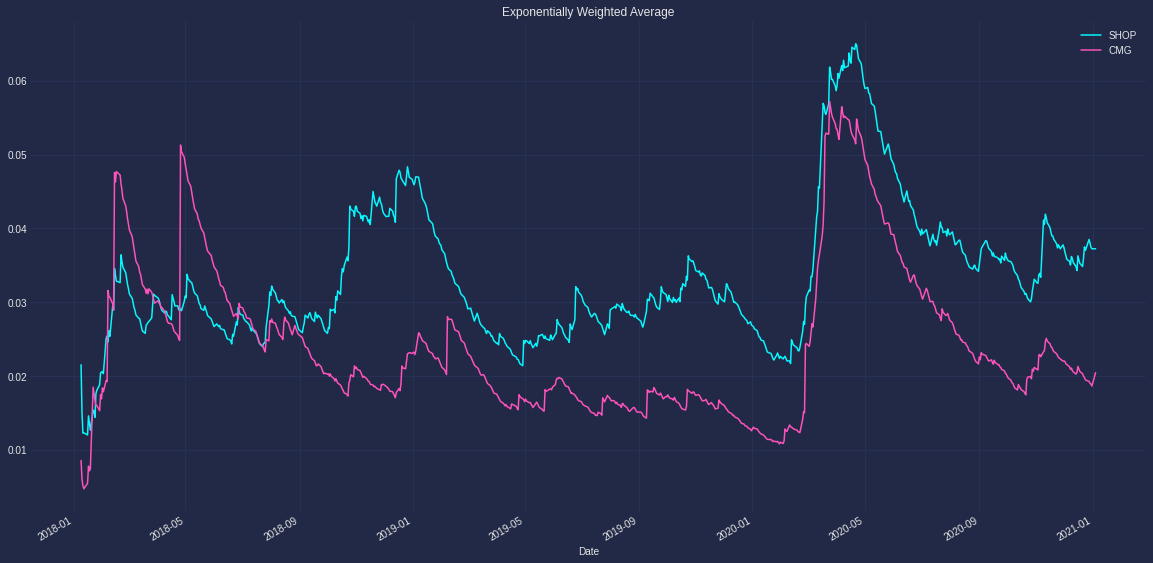

In [22]:
# Calculate a rolling window using the Exponentially Weighted Moving Average. 

daily_portfolio.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

In [23]:
# Calculate annualized Sharpe Ratios

sharpe_ratios = (daily_portfolio.mean() * 252) / (daily_portfolio.std() * np.sqrt(252))

# Visualize the sharpe ratios as a bar plot
sharpe_ratios.hvplot.barh(figsize=(15, 8), title="Sharpe Ratios", color= 'red')

:Bars   [index]   (0)

In [24]:
# Prepare DataFrame for metrics

metrics = [
    'FB Annual Return', 'AMZN Annual Return', 'TSLA Annual Return','PANW Annual Return','SHOP Annual Return', 'CMG Annual Return',
    'FB Annual Volatility','AMZN Annual Volatility','TSLA Annual Volatility','PANW Annual Volatility','SHOP Annual Volatility','CMG Annual Volatility',
    'FB Sharpe Ratio','AMZN Sharpe Ratio','TSLA Sharpe Ratio','PANW Sharpe Ratio','SHOP Sharpe Ratio','CMG Sharpe Ratio']
    
columns = ['Backtest']

# Initialize the DataFrame with index set to evaluation metrics and column as `Backtest`.
portfolio_evaluation_df = pd.DataFrame(index=metrics, columns=columns)
portfolio_evaluation_df

,Backtest
FB Annual Return,NaN
AMZN Annual Return,NaN
TSLA Annual Return,NaN
PANW Annual Return,NaN
SHOP Annual Return,NaN
CMG Annual Return,NaN
FB Annual Volatility,NaN
AMZN Annual Volatility,NaN
TSLA Annual Volatility,NaN
PANW Annual Volatility,NaN


In [26]:
# Calculate annualized return
# portfolio_evaluation_df.loc['FB Annual Return'] = daily_portfolio['FB'].std() * np.sqrt(252)
# portfolio_evaluation_df.loc['AMZN Annual Return'] = daily_portfolio['AMZN'].std() * np.sqrt(252)
# portfolio_evaluation_df.loc['TSLA Annual Return'] = daily_portfolio['TSLA'].std() * np.sqrt(252)
# portfolio_evaluation_df.loc['PANW Annual Return'] = daily_portfolio['PANW'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['SHOP Annual Return'] = daily_portfolio['SHOP'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['CMG Annual Return'] = daily_portfolio['CMG'].std() * np.sqrt(252)

# Calculate annual volatility
# portfolio_evaluation_df.loc['FB Annual Volatility'] = daily_portfolio['FB'].std() * np.sqrt(252)
# portfolio_evaluation_df.loc['AMZN Annual Volatility'] = daily_portfolio['AMZN'].std() * np.sqrt(252)
# portfolio_evaluation_df.loc['TSLA Annual Volatility'] = daily_portfolio['TSLA'].std() * np.sqrt(252)
# portfolio_evaluation_df.loc['PANW Annual Volatility'] = daily_portfolio['PANW'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['SHOP Annual Volatility'] = daily_portfolio['SHOP'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['CMG Annual Volatility'] = daily_portfolio['CMG'].std() * np.sqrt(252)

# Calculate Sharpe Ratio
# portfolio_evaluation_df.loc['FB Sharpe Ratio'] = sharpe_ratios['FB']
# portfolio_evaluation_df.loc['AMZN Sharpe Ratio'] = sharpe_ratios['AMZN']
# portfolio_evaluation_df.loc['TSLA Sharpe Ratio'] = sharpe_ratios['TSLA']
# portfolio_evaluation_df.loc['PANW Sharpe Ratio'] = sharpe_ratios['PANW']
portfolio_evaluation_df.loc['SHOP Sharpe Ratio'] = sharpe_ratios['SHOP']
portfolio_evaluation_df.loc['CMG Sharpe Ratio'] = sharpe_ratios['CMG']

portfolio_evaluation_df.head(18)

,Backtest
FB Annual Return,NaN
AMZN Annual Return,NaN
TSLA Annual Return,NaN
PANW Annual Return,NaN
SHOP Annual Return,0.557858
CMG Annual Return,0.413833
FB Annual Volatility,NaN
AMZN Annual Volatility,NaN
TSLA Annual Volatility,NaN
PANW Annual Volatility,NaN


In [27]:
portfolio_evaluation_df.reset_index(inplace=True)

portfolio_evaluation_table = portfolio_evaluation_df.hvplot.table()